In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [10]:
#on initialise les paramètres


def initialisation(n0, n1, n2):

    #on initialise une matrice de dimension n1*n0
    W1 = np.random.randn(n1, n0)
    #on initialise un vecteur de dimension n1
    b1 = np.zeros((n1, 1))
    #on initialise une matrice de dimension n2*n1
    W2 = np.random.randn(n2, n1)
    #on initialise un vecteur de dimension n2
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [58]:
def forward_propagation(X, parametres):

    #on récupère les paramètres pour nos 2 couches
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    #on calcule les activations de la première couche 
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    #on calcule les activations de la deuxième couche à partir de l'activation de la première couche
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [61]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)
    
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = { 
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [5]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [6]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']
  return A2 >= 0.5

In [59]:
def neural_network(X, y, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres

Dataset

dimensions de X: (2, 1000)
dimensions de y: (1, 1000)


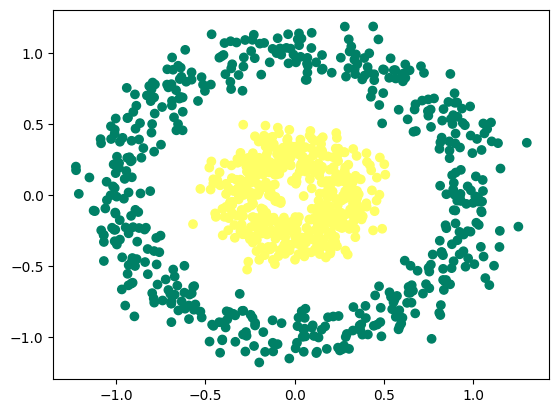

In [16]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 10000/10000 [00:33<00:00, 300.52it/s]


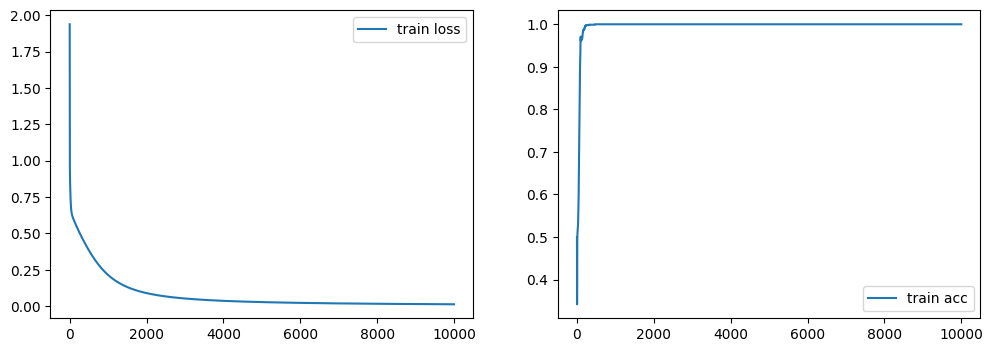

{'W1': array([[ 3.00500805e+00,  4.91938214e-01],
        [ 1.15456802e+00,  2.71851640e+00],
        [ 2.58311867e+00, -1.38294689e+00],
        [ 1.23734808e+00, -2.23455830e-01],
        [-2.43042597e-01,  4.20168161e-01],
        [ 1.45627008e-01,  1.45817244e+00],
        [ 7.31676196e-01,  1.49351874e-01],
        [ 5.90485298e-01,  3.10591668e-01],
        [ 2.35875271e+00, -3.56774732e-01],
        [ 2.87802642e-01, -8.80886712e-01],
        [-2.60718478e+00,  6.36060543e-01],
        [ 1.13636212e+00, -1.22217869e+00],
        [ 3.96546810e+00, -2.78663035e+00],
        [ 1.27156495e-01, -2.13385216e-01],
        [ 1.62802168e+00,  1.52450829e+00],
        [ 2.67908336e-01,  3.50100346e-01],
        [-9.30807541e-01, -5.46743791e+00],
        [-1.82688764e-01,  1.13894537e-01],
        [ 1.97386267e+00,  2.09752901e+00],
        [-2.12585601e-01, -3.74416237e-01],
        [-2.48077774e+00, -2.91895478e+00],
        [-2.78489366e+00,  3.03087493e+00],
        [-5.25506408e-01, 

In [62]:
neural_network(X, y, n1=64, n_iter=10000)